In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math 
import pandas as pd
df = pd.read_csv(r'C:\Users\ian\Desktop\data\data\population.csv')

In [4]:
df.head()

,year,pop
0,1950,2.53
1,1951,2.57
2,1952,2.62
3,1953,2.67
4,1954,2.71


In [5]:
w = ((df['pop'] - df['pop'].mean()) * df['year']).sum() / ((df['year'] - df['year'].mean())**2).sum()
b = df['pop'].mean() - w * df['year'].mean()

In [12]:
print(f'w = {w}, b = {b}')

w = 0.061159358661557375, b = -116.35631056117687


In [13]:
coef = np.polyfit(df['year'], df['pop'], deg = 1)
print(f'w = {coef[0]}, b = {coef[1]}')

w = 0.061159358661554586, b = -116.35631056117121


In [1]:
from sklearn.datasets import load_boston
import torch

In [16]:
x, y = load_boston(return_X_y = True)

In [18]:
X_tensor = torch.from_numpy(x)

In [19]:
def func(x): return x ** 2 

In [20]:
def dfunc(x): return 2 * x

In [21]:
def GD(x_start, df, epochs, lr):
    xs = np.zeros(epochs + 1)
    x = x_start
    xs[0] = x
    for i in range(epochs):
        dx = df(x)
        x += - dx * lr
        xs[i+1] = x
    return xs

In [22]:
x_start = 5
epochs = 15
lr = 0.3

w = GD(x_start, dfunc, epochs, lr = lr)
print(np.around(w, 2))

[5.   2.   0.8  0.32 0.13 0.05 0.02 0.01 0.   0.   0.   0.   0.   0.
 0.   0.  ]


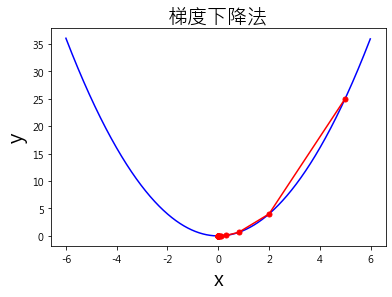

In [34]:
t = np.arange(-6.0, 6.0, 0.01)
plt.plot(t, func(t), c = 'b')
plt.plot(w, func(w), c = 'r', marker = 'o', markersize = 5)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False
plt.title('梯度下降法', fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.show()

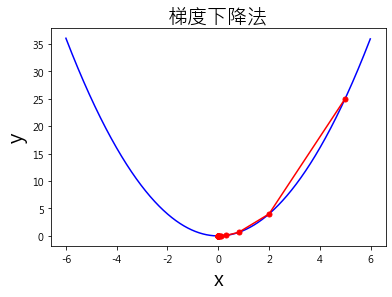

In [36]:
plt.plot(t, func(t), c = 'b')
plt.plot(w, func(w), c = 'r', marker = 'o', markersize = 5)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.title('梯度下降法', fontsize = 20)
plt.xlabel('x', fontsize = 20)
plt.ylabel('y', fontsize = 20)
plt.show()

In [1]:
origin = [0], [0]

In [2]:
origin

([0], [0])

In [6]:
torch.version.cuda

'11.3'

In [7]:
torch.cuda.device_count()

1

In [11]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 3060 Laptop GPU'

In [10]:
x = torch.tensor(4.0, requires_grad = True)
y = x ** 2

In [12]:
print(y)

tensor(16., grad_fn=<PowBackward0>)


In [13]:
print(y.grad_fn)

In [14]:
y.backward()

In [15]:
print(x.grad)

tensor(8.)


In [18]:
x = torch.tensor(1.0, requires_grad = True)
y = torch.tensor(2.0)
z = x * y

In [20]:
for i, name in zip([x,y,z], 'xyz'):
    print(f'{name}\ndata: {i.data}\nrequires_grad:{i.requires_grad}\n' + 
         f'grad: {i.grad}\ngrad_fn: {i.grad_fn}\n is_leaf:{i.is_leaf}\n')

x
data: 1.0
requires_grad:True
grad: None
grad_fn: None
 is_leaf:True

y
data: 2.0
requires_grad:False
grad: None
grad_fn: None
 is_leaf:True

z
data: 2.0
requires_grad:True
grad: None
grad_fn: <MulBackward0 object at 0x000001D3852845E0>
 is_leaf:False



C:\Users\ian\anaconda3\lib\site-packages\torch\_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten\src\ATen/core/TensorBody.h:417.)
  return self._grad


In [21]:
x = torch.ones(5)

In [23]:
y = torch.zeros(3)

In [25]:
w = torch.randn(5, 3, requires_grad = True)

In [27]:
b = torch.randn(3, requires_grad = True)

In [29]:
z = torch.matmul(x,w)

In [30]:
z

tensor([1.4478, 5.4936, 2.4938], grad_fn=<SqueezeBackward3>)